In [34]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [35]:
import csv, sqlite3
conn = sqlite3.connect("socioeconomic.db")
cur = conn.cursor()

In [36]:
%sql sqlite:///socioeconomic.db

In [39]:
import pandas as pd
df = pd.read_csv("https://data.cityofchicago.org/resource/jcxq-k9xf.csv")
df.to_sql("chicago_socioeconomic_data", conn, if_exists='replace', index=False, method='multi')

In [40]:
%sql select * from chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [41]:
#how many rows in the dataset
%sql select count(*) from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [42]:
%sql select count(*) from chicago_socioeconomic_data where hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


count(*)
38


In [43]:
%sql select max(hardship_index) from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


max(hardship_index)
98.0


In [44]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = (select max(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [45]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///socioeconomic.db
Done.


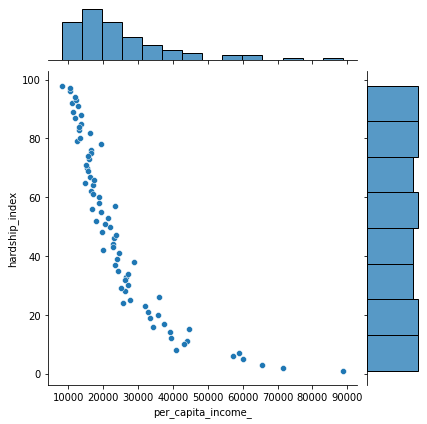

In [46]:
#Create a scatter plot using the variables per_capita_income_ and hardship_index
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_hardship = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data;
plot = sns.jointplot(x="per_capita_income_", y="hardship_index", data=income_hardship.DataFrame())

You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.

 * sqlite:///socioeconomic.db
Done.


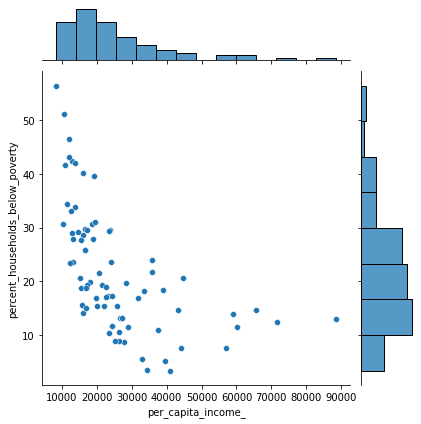

In [47]:
#see how the variable per_capita_income_ is related to percent_households_below_poverty
income_household = %sql select per_capita_income_, percent_households_below_poverty from chicago_socioeconomic_data;
plot = sns.jointplot(x="per_capita_income_", y="percent_households_below_poverty", data=income_household.DataFrame())

 * sqlite:///socioeconomic.db
Done.


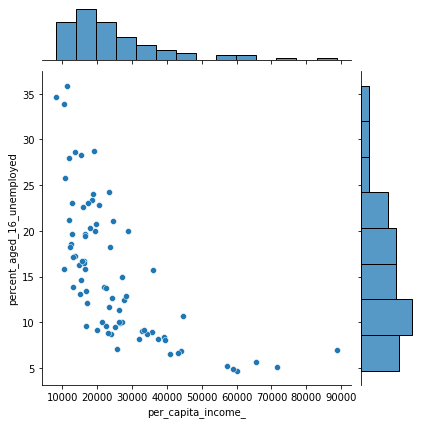

In [48]:
#see how the variable per_capita_income_ is related to percent_aged_16_unemployed
income_16_unemployed = %sql select per_capita_income_, percent_aged_16_unemployed from chicago_socioeconomic_data;
plot = sns.jointplot(x="per_capita_income_", y="percent_aged_16_unemployed", data=income_16_unemployed.DataFrame())